In [751]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [752]:
Data = pd.read_csv("Hotel Reservations.csv")
Data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Описание датасета

Этот датасет описывает разные признаки бронирующего. Пояснения признаков обозначены ниже.

***Booking_ID***: уникальный идентификатор бронирующего

***no_of_adults***: Количество взрослых

***no_of_children***: Количество детей

***no_of_weekend_nights***: Количество ночей выходного дня (суббота или воскресенье), которые гость провел или забронировал для проживания в отеле

***no_of_week_nights***: Количество ночей в неделю (с понедельника по пятницу), в течение которых гость останавливался или забронировал проживание в отеле

***type_of_meal_plan***: Тип плана питания, забронированного клиентом

***required_car_parking_space***: Требуется ли клиенту место для парковки автомобиля? (0 - Нет, 1- Да)

***room_type_reserved***: Тип номера, забронированного клиентом. Значения зашифрованы (закодированы) отелями INN.

***lead_time***: Количество дней между датой бронирования и датой прибытия

***arrival_year***: Год прибытия дата

***arrival_month***: Месяц даты прибытия

***arrival_date***: Число месяца

***market_segment_type***: Обозначение сегмента рынка.

***repeated_guest***: Является ли клиент постоянным гостем? (0 - Нет, 1- Да)

***no_of_previous_cancellations***: Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования

***no_of_previous_bookings_not_canceled***: Количество предыдущих бронирований, не отмененных клиентом до текущего бронирования

***avg_price_per_room***: Средняя цена за день бронирования; цены на номера динамичны. (в евро)

***no_of_special_requests***: Общее количество особых запросов, сделанных заказчиком (например, высокий этаж, вид из комнаты и т.д.)

***booking_status***: Флажок, указывающий, было ли бронирование отменено или нет.

# Notes
***1)*** Соединить ***arrival_date***, ***arrival_month***, ***arrival_year*** в единую дату и посмотреть на сезонность

***2)*** Обработать ***avg_price_per_room***, как 1-дешево, 2-недорого, 3-дорого

***3)*** Обработать ***no_of_special_requests***, как 0-немного, 1-много 

***4)*** Обработать ***no_of_previous_bookings_not_canceled*** и ***no_of_previous_cancellations*** , как процент успешных(не отмененных бронирований)

***5)*** Обработать ***market_segment_type***, через onehotencoding

***6)*** Обработать ***room_type_reserved***: взять цифру в конце

***7)*** Обработать ***type_of_meal_plan***: взять цифры, а для Not selected поставить 0

In [753]:
Data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [754]:
if Data.dropna().shape == Data.shape:
    print('Пропусков в датасете нет')
else:
    print('Строк с пропусками',Data.shape[0] -Data.dropna().shape[0])

Пропусков в датасете нет


In [755]:
# Склеем год, месяц и день в дату
def data_1(data):
    year_list = Data.arrival_year
    month_list = Data.arrival_month
    day_list = Data.arrival_date
    date_list = []
    for i in range(len(year_list)):
        date_list.append((str(year_list[i])+'-'+str(month_list[i])+'-'+str(day_list[i])))
    return date_list

In [756]:
# Закодируем целевую переменную, 0-отмена брони, 1-бронь реализовалась
def target(date):
    if date == 'Canceled':
        return 0
    else:
        return 1

In [757]:
Data['date'] = data_1(Data)
Data.drop(list(Data[Data.date == '2018-2-29'].index), inplace=True)
Data['date'] = pd.to_datetime(Data.date)
Data.sort_values(by=['date'], inplace=True)
Data.reset_index(inplace=True)

In [758]:
Data.booking_status = Data.booking_status.apply(target)

***Построим гистограмму и посмотрим, как зависит целевая переменная от времени***

<AxesSubplot:xlabel='date', ylabel='Count'>

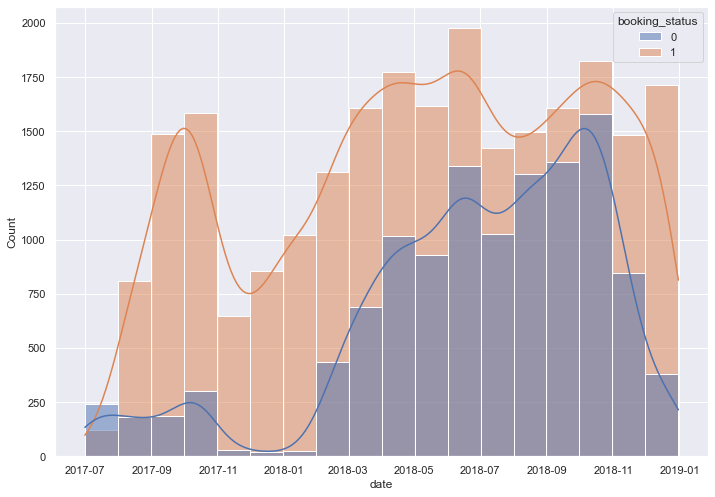

In [759]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(x=Data.date, kde=True,bins=18, hue=Data.booking_status)

***Из такой гистограммы видно, что есть ~3 экстремума***:

-1й в конце 2017 года в октябре(возможно бронирование связано с ноябрьскими праздниками)

-2й приходится на весну и начало лета 2018 года и длится около 5 месяцев до августа

-3й снова приходится на сентярбрь-октябрь 2018 года

In [760]:
# Введем дамми-переменную, учитывающую сезонность
def get_season(data):
    if pd.to_datetime('2017-09-01') < data <pd.to_datetime('2017-11-01'):
        return 1
    elif pd.to_datetime('2018-03-01') < data <pd.to_datetime('2018-07-01'):
        return 3
    elif pd.to_datetime('2018-08-01') < data <pd.to_datetime('2018-11-01'):
        return 2
    else:
        return 0

In [761]:
Data.avg_price_per_room.describe()

count    36238.000000
mean       103.437259
std         35.084264
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

In [762]:
# Пусть в пределах от 25% до 75% квантиля будет средняя цена, а ниже/выше соответственно низкая/высокая
def price(data):
    if data < 80.3:
        return 1
    elif 80.3 <= data < 120:
        return 2
    elif data >= 120:
        return 3

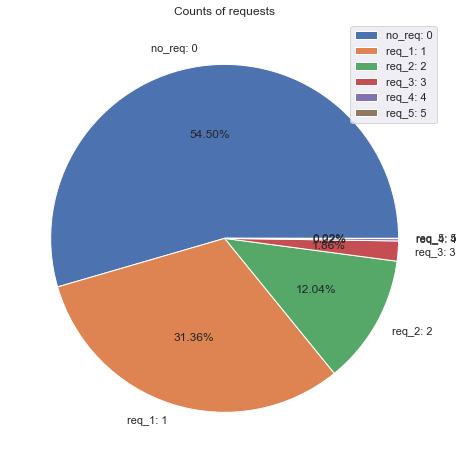

In [763]:
# Построим диаграмму распределений специальных запросов
no_req = Data.no_of_special_requests.value_counts()[0]
req_1 = Data.no_of_special_requests.value_counts()[1]
req_2 = Data.no_of_special_requests.value_counts()[2]
req_3 = Data.no_of_special_requests.value_counts()[3]
req_4 = Data.no_of_special_requests.value_counts()[4]
req_5 = Data.no_of_special_requests.value_counts()[5]
plt.figure(figsize=(8, 8))
plt.pie([no_req,req_1,req_2,req_3,req_4,req_5],labels=['no_req: '+str(0),'req_1: '+str(1), 'req_2: '+str(2),
                                                       'req_3: '+str(3),'req_4: '+str(4),'req_5: '+str(5)], autopct="%.2f%%")
plt.title("Counts of requests")
plt.legend()
plt.show()

***Из диаграммы видно, что очень малый процент клиентов делали 3 и более уникальных просьб, кодируем их как "много", у большинства было до 3 просьб, закодируем их как "немного"***

In [764]:
def requests(data):
    if data <= 2:
        return 0
    else:
        return 1

In [765]:
# Посчитаем процент удачных бронирований, если их не было,то вернем 0
def percent(Data):
    Data['Percent'] = Data.no_of_previous_bookings_not_canceled/(Data.no_of_previous_bookings_not_canceled+Data.no_of_previous_cancellations)
    Data.Percent.fillna(0,inplace=True)
    return Data

In [766]:
#Тип комнаты
def room_type(data):
    return int(data[-1])

In [767]:
#Тип питания
def transf_meal_plan(data):
    if data == 'Meal Plan 1':
        return 1
    elif data == 'Meal Plan 2':
        return 2
    elif data == 'Meal Plan 3':
        return 3
    else:
        return 0

In [768]:
def preprocessing(Data):
    Data['Season'] = Data.date.apply(get_season)
    Data['Price'] = Data.avg_price_per_room.apply(price)
    Data['Requests'] = Data.no_of_special_requests.apply(requests)
    Data = percent(Data)
    Data.room_type_reserved = Data.room_type_reserved.apply(room_type)
    Data.type_of_meal_plan = Data.type_of_meal_plan.apply(transf_meal_plan)
    Data = pd.concat([Data,pd.get_dummies(Data.market_segment_type)], axis=1)
    Data.drop('market_segment_type', axis=1, inplace=True)
    Data = pd.concat([Data,pd.get_dummies(Data.arrival_year)], axis=1)
    Data.drop('arrival_year', axis=1, inplace=True)
    return Data

In [769]:
Data = preprocessing(Data)

In [770]:
Data.corrwith(Data.booking_status)

index                                  -0.006332
no_of_adults                           -0.086671
no_of_children                         -0.033033
no_of_weekend_nights                   -0.061704
no_of_week_nights                      -0.092904
type_of_meal_plan                      -0.049641
required_car_parking_space              0.086053
room_type_reserved                     -0.023313
lead_time                              -0.438629
arrival_month                           0.011789
arrival_date                           -0.011109
repeated_guest                          0.107490
no_of_previous_cancellations            0.033871
no_of_previous_bookings_not_canceled    0.060046
avg_price_per_room                     -0.142721
no_of_special_requests                  0.253339
booking_status                          1.000000
Season                                 -0.135799
Price                                  -0.121549
Requests                                0.102271
Percent             

***Посмотрев на коэффициенты корреляции можно сделать вывод о целесобразности использования некоторых регрессоров, видно, что некоторые из них можно исключить***

In [771]:
# Выбросим неактуальные предикторы
Data.drop(['index','Booking_ID','date','arrival_date','Aviation'],axis=1,inplace=True)

In [772]:
Data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,repeated_guest,...,Season,Price,Requests,Percent,Complementary,Corporate,Offline,Online,2017,2018
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,...,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000
mean,1.845301,0.105221,0.810475,2.204206,0.949859,0.030934,1.708455,85.275070,7.429190,0.025553,...,1.493846,2.018406,0.021000,0.020813,0.010762,0.055494,0.290248,0.640046,0.179756,0.820244
std,0.518572,0.402540,0.870992,1.410784,0.480313,0.173142,1.399451,85.953561,3.066563,0.157801,...,1.247257,0.717456,0.143386,0.139654,0.103183,0.228946,0.453883,0.479993,0.383989,0.383989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,17.000000,5.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,57.000000,8.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000,126.000000,10.000000,0.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,7.000000,443.000000,12.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***Видно, что средние у некоторых предикторов сильно отличаются, нужно масштабировать данные***

In [773]:
numeric_data = ['lead_time', 'Percent','avg_price_per_room']
binary_date = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_month',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'Price', 'Requests', 
       'Complementary', 'Corporate', 'Offline', 'Online', 'Season', 2017, 2018]

In [774]:
X = Data.drop('booking_status', axis=1)
y = Data.booking_status

***Данные обработаны, теперь обучим модели и посмотрим на метрики качества для выбора наилучшей модели***

Разобьем данные на обучающие и тестовые, возьмем последние 20% на тест, а 80% на обучения

In [775]:
(X_train,X_test,y_train,y_test) = train_test_split(X, y, test_size=0.2)

In [776]:
Scaler = StandardScaler()
X_train[numeric_data] = Scaler.fit_transform(X_train[numeric_data])
X_test[numeric_data] = Scaler.transform(X_test[numeric_data])

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [777]:
X = shuffle(Data.drop('booking_status',axis=1),random_state=1)
y = shuffle(Data.booking_status,random_state=1)

X[numeric_data] = Scaler.transform(X[numeric_data])
algos = [
    RandomForestClassifier(class_weight='balanced'), 
    LogisticRegression(max_iter=300, n_jobs=4,class_weight='balanced'),
    DecisionTreeClassifier(),
    XGBClassifier(),
    KNeighborsClassifier()
        ]

df = {'Model':[], 'Accuracy score in train':[], 'Accuracy score in test': [],
      'Cros Val score':[]}

for algo in algos:
    model = algo.fit(X=X_train, y=y_train)
    proba = model.predict_proba(X_test)
    y_pred = []
    for p in proba:
        if p[0] > p[1]:
            y_pred.append(0)
        else:
            y_pred.append(1)
#     print(classification_report(y_test,y_pred))
    df['Model'].append(str(algo)[:str(algo).find('(')])
    df["Accuracy score in test"].append(accuracy_score(y_test, y_pred))
    df["Accuracy score in train"].append(algo.score(X_train, y_train))
    df["Cros Val score"].append(cross_val_score(algo, X, y, cv=10, scoring='accuracy').mean())
    
models = pd.DataFrame(df)

In [778]:
models

,Model,Accuracy score in train,Accuracy score in test,Cros Val score
0,RandomForestClassifier,0.992825,0.899283,0.898670
1,LogisticRegression,0.779545,0.776214,0.778740
2,DecisionTreeClassifier,0.993274,0.868653,0.870302
3,XGBClassifier,0.913694,0.889901,0.893344
4,KNeighborsClassifier,0.899966,0.842715,0.853220
